<a href="https://colab.research.google.com/github/keshavisha/Music-Genre/blob/main/Prediction_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

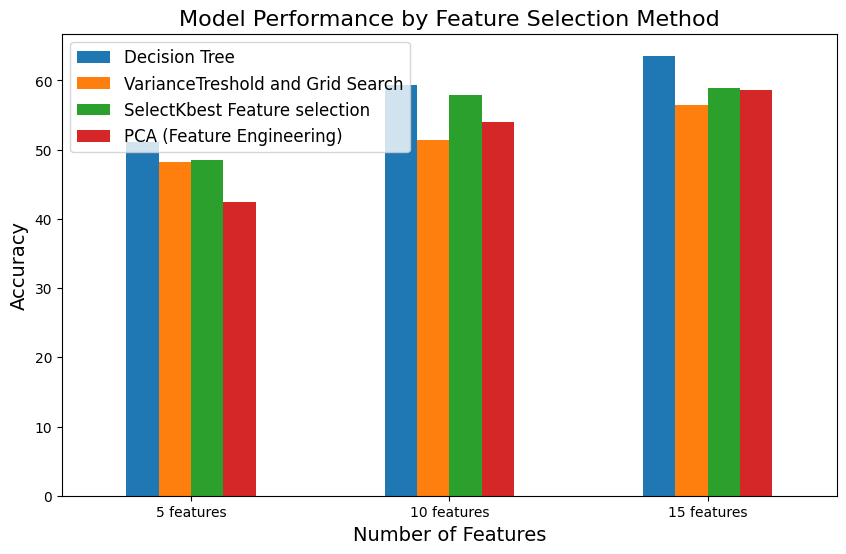

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dictionary of results
results = {'Decision Tree': [51.0714, 59.2857, 63.5714],
           'VarianceTreshold and Grid Search': [48.214, 51.42857, 56.428],
           'SelectKbest Feature selection': [48.5714, 57.85714, 58.92857],
           'PCA (Feature Engineering)': [42.5, 53.928, 58.57]}

# create a dataframe from the dictionary
df = pd.DataFrame(results, index=['5 features', '10 features', '15 features'])

# plot the dataframe as a bar graph
ax = df.plot(kind='bar', rot=0, figsize=(10,6))

# set the title and axis labels
ax.set_title('Model Performance by Feature Selection Method', fontsize=16)
ax.set_xlabel('Number of Features', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# add the legend
ax.legend(fontsize=12)

# display the graph
plt.show()


In [2]:
!pip install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import librosa
import numpy as np
import pickle
def extract_features(audio_data, sr):
    perceptr_var = np.var(librosa.feature.spectral_contrast(y=audio_data, sr=sr)[1])
    rolloff_var = np.var(librosa.feature.spectral_rolloff(y=audio_data, sr=sr))
    spectral_bandwidth_mean = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sr))
    mfcc4_mean = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr)[3])
    mfcc7_var = np.var(librosa.feature.mfcc(y=audio_data, sr=sr)[6])
    chroma_stft_mean = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr))
    rms_mean = np.mean(librosa.feature.rms(y=audio_data))
    harmony_var = np.var(librosa.effects.harmonic(y=audio_data))
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sr))
    mfcc20_mean = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr)[19])
    mfcc5_var = np.var(librosa.feature.mfcc(y=audio_data, sr=sr)[4])
    rms_var = np.var(librosa.feature.rms(y=audio_data))
    mfcc18_var = np.var(librosa.feature.mfcc(y=audio_data, sr=sr)[17])
    chroma_stft_var = np.var(librosa.feature.chroma_stft(y=audio_data, sr=sr))
    mfcc12_var = np.var(librosa.feature.mfcc(y=audio_data, sr=sr)[11])
    mfcc1_mean = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr)[0])
    features = np.array([perceptr_var, rolloff_var, spectral_bandwidth_mean, mfcc4_mean, mfcc7_var, chroma_stft_mean, rms_mean, harmony_var, spectral_centroid_mean, mfcc20_mean, mfcc5_var, rms_var, mfcc18_var, chroma_stft_var, mfcc12_var, mfcc1_mean])
    features = np.reshape(features, (1, -1))
    df_features = pd.DataFrame(features, columns=["perceptr_var","rolloff_var","spectral_bandwidth_mean","mfcc4_mean","mfcc7_var","chroma_stft_mean","rms_mean","harmony_var","spectral_centroid_mean","mfcc20_mean","mfcc5_var","rms_var","mfcc18_var","chroma_stft_var","mfcc12_var","mfcc1_mean"])
    return df_features

with open('clf_final.pickle', 'rb') as f:
    clf_final = pickle.load(f)
audio_data, sr = librosa.load('Hip-Hop.wav')
print(clf_final.predict(extract_features(audio_data,sr)))

['hiphop']


In [10]:
from IPython.display import Audio
audio_wdt = Audio(data=audio_data,rate=sr)
display(audio_wdt)

In [11]:
audio_data, sr = librosa.load('Classical-Music.wav')
print(clf_final.predict(extract_features(audio_data,sr)))

['jazz']


In [12]:
audio_wdt = Audio(data=audio_data,rate=sr)
display(audio_wdt)